<a href="https://colab.research.google.com/github/Grazipolachini/CursoDataScience/blob/main/ProjetoDSParteI_Polachini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hipóteses / Perguntas:

1 - Existe relação entre idade, diagnóstico e número de visitas hospitalares?

2 - A taxa de tabagismo (fumantes) varia de acordo com a faixa de renda?

3 - Pacientes com doenças crônicas fazem mais visitas ao hospital?

4 - Há diferenças regionais significativas no acesso ao sistema de saúde?

5 - Pessoas com maior BMI (IMC) apresentam mais doenças crônicas?


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/Grazipolachini/CursoDataScience/refs/heads/main/health_data.csv")

<ipython-input-30-707713325>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diagnosis', y='Hospital_Visits', data=mean_visits, palette='pastel')


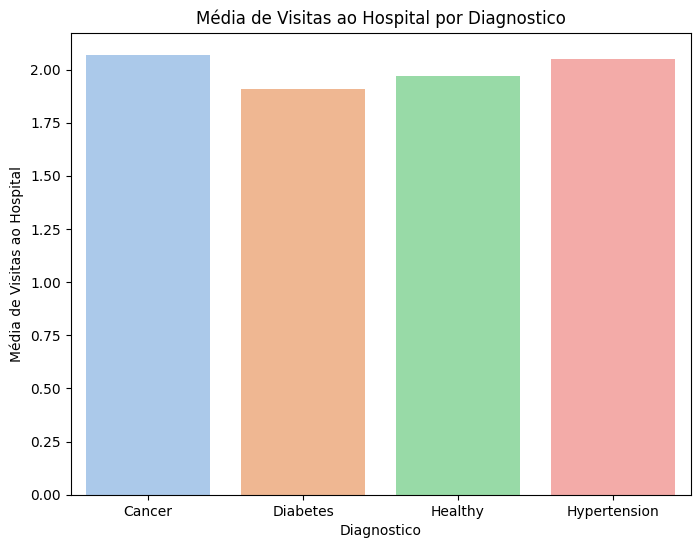

In [30]:
plt.figure(figsize=(8,6))

# Calcular média de visitas por grupo
mean_visits = df.groupby('Diagnosis')['Hospital_Visits'].mean().reset_index()

sns.barplot(x='Diagnosis', y='Hospital_Visits', data=mean_visits, palette='pastel')

plt.title('Média de Visitas ao Hospital por Diagnostico')
plt.xlabel('Diagnostico')
plt.ylabel('Média de Visitas ao Hospital')

plt.show()


No gráfico acima, é possível verificar que pessoas com cancer e hipertensao, visitam mais o hospital do que pessoas saudaveis ou com diabetes

<ipython-input-32-3512467078>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chronic_perc = df.groupby('BMI_Category')['Chronic_Disease'].apply(lambda x: (x=='Yes').mean() * 100).reset_index()
<ipython-input-32-3512467078>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='BMI_Category', y='Chronic_Disease', data=chronic_perc, palette='coolwarm')


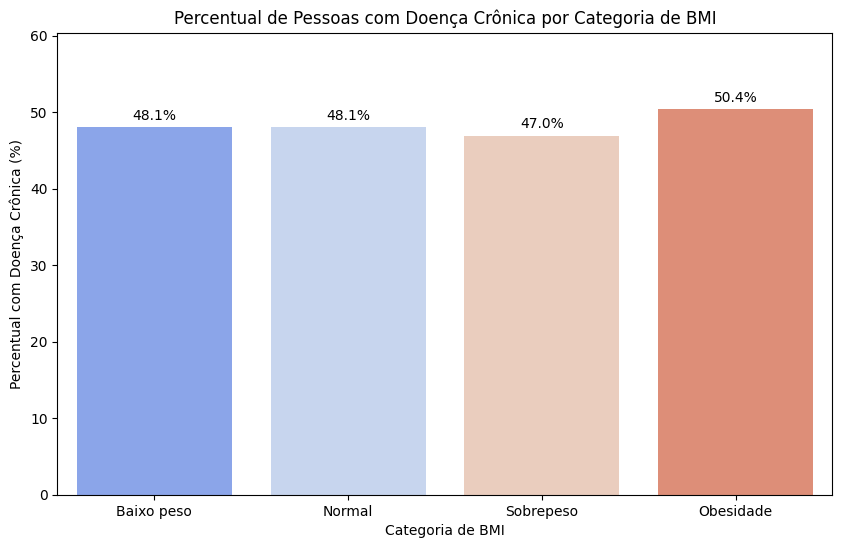

In [32]:
# Criar faixas de BMI
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Baixo peso', 'Normal', 'Sobrepeso', 'Obesidade']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# Calcular % de pessoas com doença crônica em cada faixa de BMI
chronic_perc = df.groupby('BMI_Category')['Chronic_Disease'].apply(lambda x: (x=='Yes').mean() * 100).reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(x='BMI_Category', y='Chronic_Disease', data=chronic_perc, palette='coolwarm')

plt.title('Percentual de Pessoas com Doença Crônica por Categoria de BMI')
plt.xlabel('Categoria de BMI')
plt.ylabel('Percentual com Doença Crônica (%)')

# Adicionar os valores em cima das barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{height:.1f}%', ha='center')

plt.ylim(0, max(chronic_perc['Chronic_Disease']) + 10)  # Espaço para os textos
plt.show()

No gráfico acima, podemos ver que o maior % de pessoas com doenças crônicas, está concentrado a um volume maior de IMC.

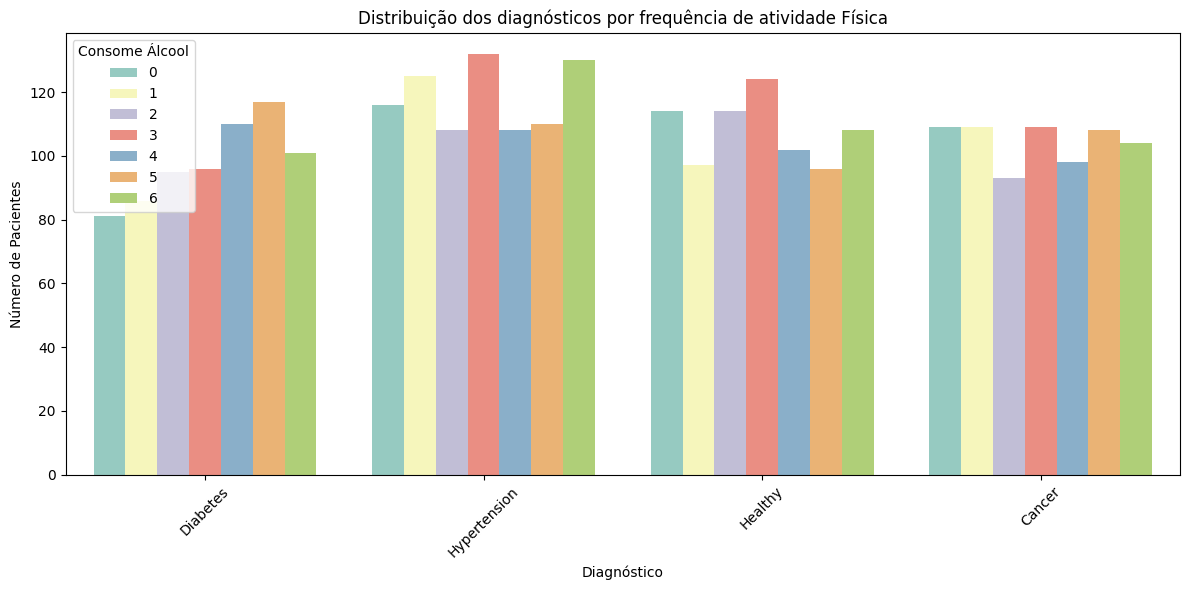

In [33]:
plt.figure(figsize=(12,6))

# Gráfico de barras agrupadas por frequência de atividade Física
sns.countplot(data=df, x='Diagnosis', hue='Exercise_Freq', palette='Set3')

# Títulos e rótulos
plt.title('Distribuição dos diagnósticos por frequência de atividade Física')
plt.xlabel('Diagnóstico')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.legend(title='Consome Álcool')
plt.tight_layout()

plt.show()


No gráfico acima, podemos notar uma frequência maior de atividade física para pessoas com hipertensão, possivelmente por conta de recomendação médica para o controle da pressão

In [14]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Sex,0
BMI,0
Smoker,0
Chronic_Disease,0
Hospital_Visits,0
Medication_Count,0
Diagnosis,0
Treatment_Success,0
